In [1]:
import os
import numpy as np
import pandas as pd

DATA_DIR = "/data/tmp/arogya/data_dec20/"
YEAR = 2020

In [2]:
ids = os.listdir(f"{DATA_DIR}/dnq_outputs")
ids

['804_0',
 '1124_0',
 '1124_1',
 '1124_2',
 '2006_0',
 '2006_1',
 '2006_2',
 '2006_3',
 '1606_0',
 '2303_0',
 '2303_1',
 '1702_0',
 '1702_1',
 '1702_2',
 '3103_0',
 '3103_1',
 '3103_2',
 '3103_3',
 '3103_4',
 '808_0',
 '2505_0',
 '1903_0',
 '1903_1',
 '1903_2',
 '1903_3',
 '2102_0',
 '2102_1',
 '2102_2',
 '1112_0',
 '1112_1',
 '2401_0',
 '1807_0',
 '1807_1',
 '605_0',
 '605_1',
 '605_2',
 '805_0',
 '901_0',
 '901_1',
 '1125_0',
 '2709_0',
 '2709_1',
 '813_0',
 '1113_0',
 '1113_1',
 '2416_0',
 '2103_0',
 '2103_1',
 '2103_2',
 '2103_3',
 '2103_4',
 '2103_5',
 '1902_0',
 '1902_1',
 '1001_0',
 '3102_0',
 '3102_1',
 '809_0',
 '1703_0',
 '2601_0',
 '2601_1',
 '2601_2',
 '2302_0',
 '2302_1',
 '1312_0',
 '1607_0',
 '2705_0',
 '2705_1',
 '2705_2',
 '2705_3',
 '3401_0',
 '814_0',
 '2309_0',
 '2309_1',
 '2309_2',
 '802_0',
 '1708_0',
 '1708_1',
 '1118_0',
 '2108_0',
 '2108_1',
 '2108_2',
 '2702_0',
 '2702_1',
 '2702_2',
 '2702_3',
 '1315_0',
 '2305_0',
 '2305_1',
 '2305_2',
 '2313_0',
 '2313_1',


In [3]:
len(np.unique([i.split("_")[0] for i in ids ]))

146

In [4]:
clustering_results_tile = None
for id_ in ids:
    if "outputs" in os.listdir(f'{DATA_DIR}/dnq_outputs/{id_}'):
        data = pd.read_csv(f'{DATA_DIR}/dnq_outputs/{id_}/outputs/predictions/kmeans_3_diff_bands/kmeans_3_diff_bands.csv')
        data['distid'] = id_.split("_")[0]
        data['tileid'] = id_.split("_")[1]
        if clustering_results_tile is None:
            clustering_results_tile = data
        else:
            clustering_results_tile = pd.concat([clustering_results_tile, data], axis=0)
#         print(clustering_results_tile.tail(2))
        
        #         print(os.listdir(f'{DATA_DIR}/dnq_outputs/{id_}/outputs/predictions/kmeans_3_diff_bands/kmeans_3_diff_bands.csv'))

In [5]:
clustering_results = clustering_results_tile.groupby(['distid', 'clust']).sum().reset_index()
clustering_results['distid'] = clustering_results['distid'].astype('int64')

In [6]:
zero=clustering_results[clustering_results['clust']==0]
one=clustering_results[clustering_results['clust']==1]

In [7]:
poppy_counts = pd.read_csv("/data/tmp/arogya/data_dec/inputs/poppy_1994-2020.csv")
# poppy_counts['distid'] = poppy_counts['distid'].astype(str)

In [8]:
poppy_counts = poppy_counts[['distid', f'X{YEAR}']]


In [9]:
type(zero)
one_j = pd.merge(one, poppy_counts)
one_j['quintile'] = pd.qcut(one_j[f'X{YEAR}'], 4, labels=False)
zero_j = pd.merge(zero, poppy_counts)
zero_j['quintile'] = pd.qcut(zero_j[f'X{YEAR}'], 4, labels=False)

In [10]:
zero_j.groupby('quintile')[['clustering_ha', f'X{YEAR}']].corr()

clustering_ha     X2020
quintile                                       
0.0      clustering_ha       1.000000  0.026627
         X2020               0.026627  1.000000
1.0      clustering_ha       1.000000 -0.000764
         X2020              -0.000764  1.000000
2.0      clustering_ha       1.000000 -0.105972
         X2020              -0.105972  1.000000
3.0      clustering_ha       1.000000  0.085426
         X2020               0.085426  1.000000

In [11]:
from IPython.display import display, HTML
corrs = one_j.groupby('quintile')[['clustering_ha', f'X{YEAR}']].corr().reset_index()
# corrs[corrs['']]
display(corrs[corrs['level_1']=='clustering_ha'][['quintile', f'X{YEAR}']].rename({f'X{YEAR}': 'pearson_correlation'},axis=1))

,quintile,pearson_correlation
0,0.0,0.131304
2,1.0,0.034921
4,2.0,0.131405
6,3.0,0.805420


In [12]:
pd.set_option('display.max_rows', 200)
one_j = one_j.rename({'clustering_ha':'predicted_ha', f'X{YEAR}': 'ground_truth_ha', 'quintile':'quintile_ground_truth'}, axis=1)
display(one_j.drop(['clust', 'pixels_from_clustering' ], axis=1))

,distid,predicted_ha,ground_truth_ha,quintile_ground_truth
0,1001,142.03,36.0,1.0
1,1002,213.11,12.0,0.0
2,1003,39.54,25.0,1.0
3,1004,24.64,NaN,NaN
4,1005,122.48,NaN,NaN
5,1006,83.04,4.0,0.0
6,1007,179.65,91.0,1.0
7,1009,74.63,1.0,0.0
8,1010,214.50,5.0,0.0
9,1011,1036.37,1.0,0.0


In [13]:
import seaborn as sns

In [14]:
one_j

,distid,clust,pixels_from_clustering,predicted_ha,ground_truth_ha,quintile_ground_truth
0,1001,1.0,14203,142.03,36.0,1.0
1,1002,1.0,21311,213.11,12.0,0.0
2,1003,1.0,3954,39.54,25.0,1.0
3,1004,1.0,2464,24.64,NaN,NaN
4,1005,1.0,12248,122.48,NaN,NaN
5,1006,1.0,8304,83.04,4.0,0.0
6,1007,1.0,17965,179.65,91.0,1.0
7,1009,1.0,7463,74.63,1.0,0.0
8,1010,1.0,21450,214.50,5.0,0.0
9,1011,1.0,103637,1036.37,1.0,0.0


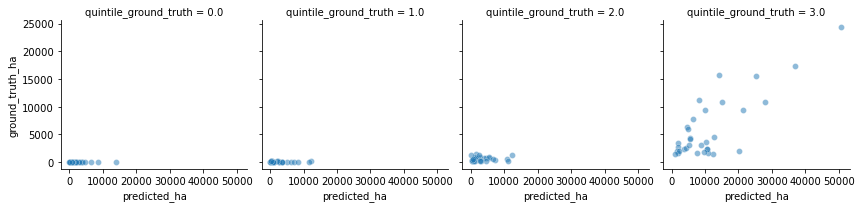

In [15]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(one_j, col='quintile_ground_truth')
g.map(sns.scatterplot, 'predicted_ha', 'ground_truth_ha', alpha=0.5)
# g.set(ylim=(750, -10));

# sns.scatterplot( x=one_j["ground_truth_ha"], y=one_j["predicted_ha"], )

<AxesSubplot:xlabel='ground_truth_ha', ylabel='predicted_ha'>

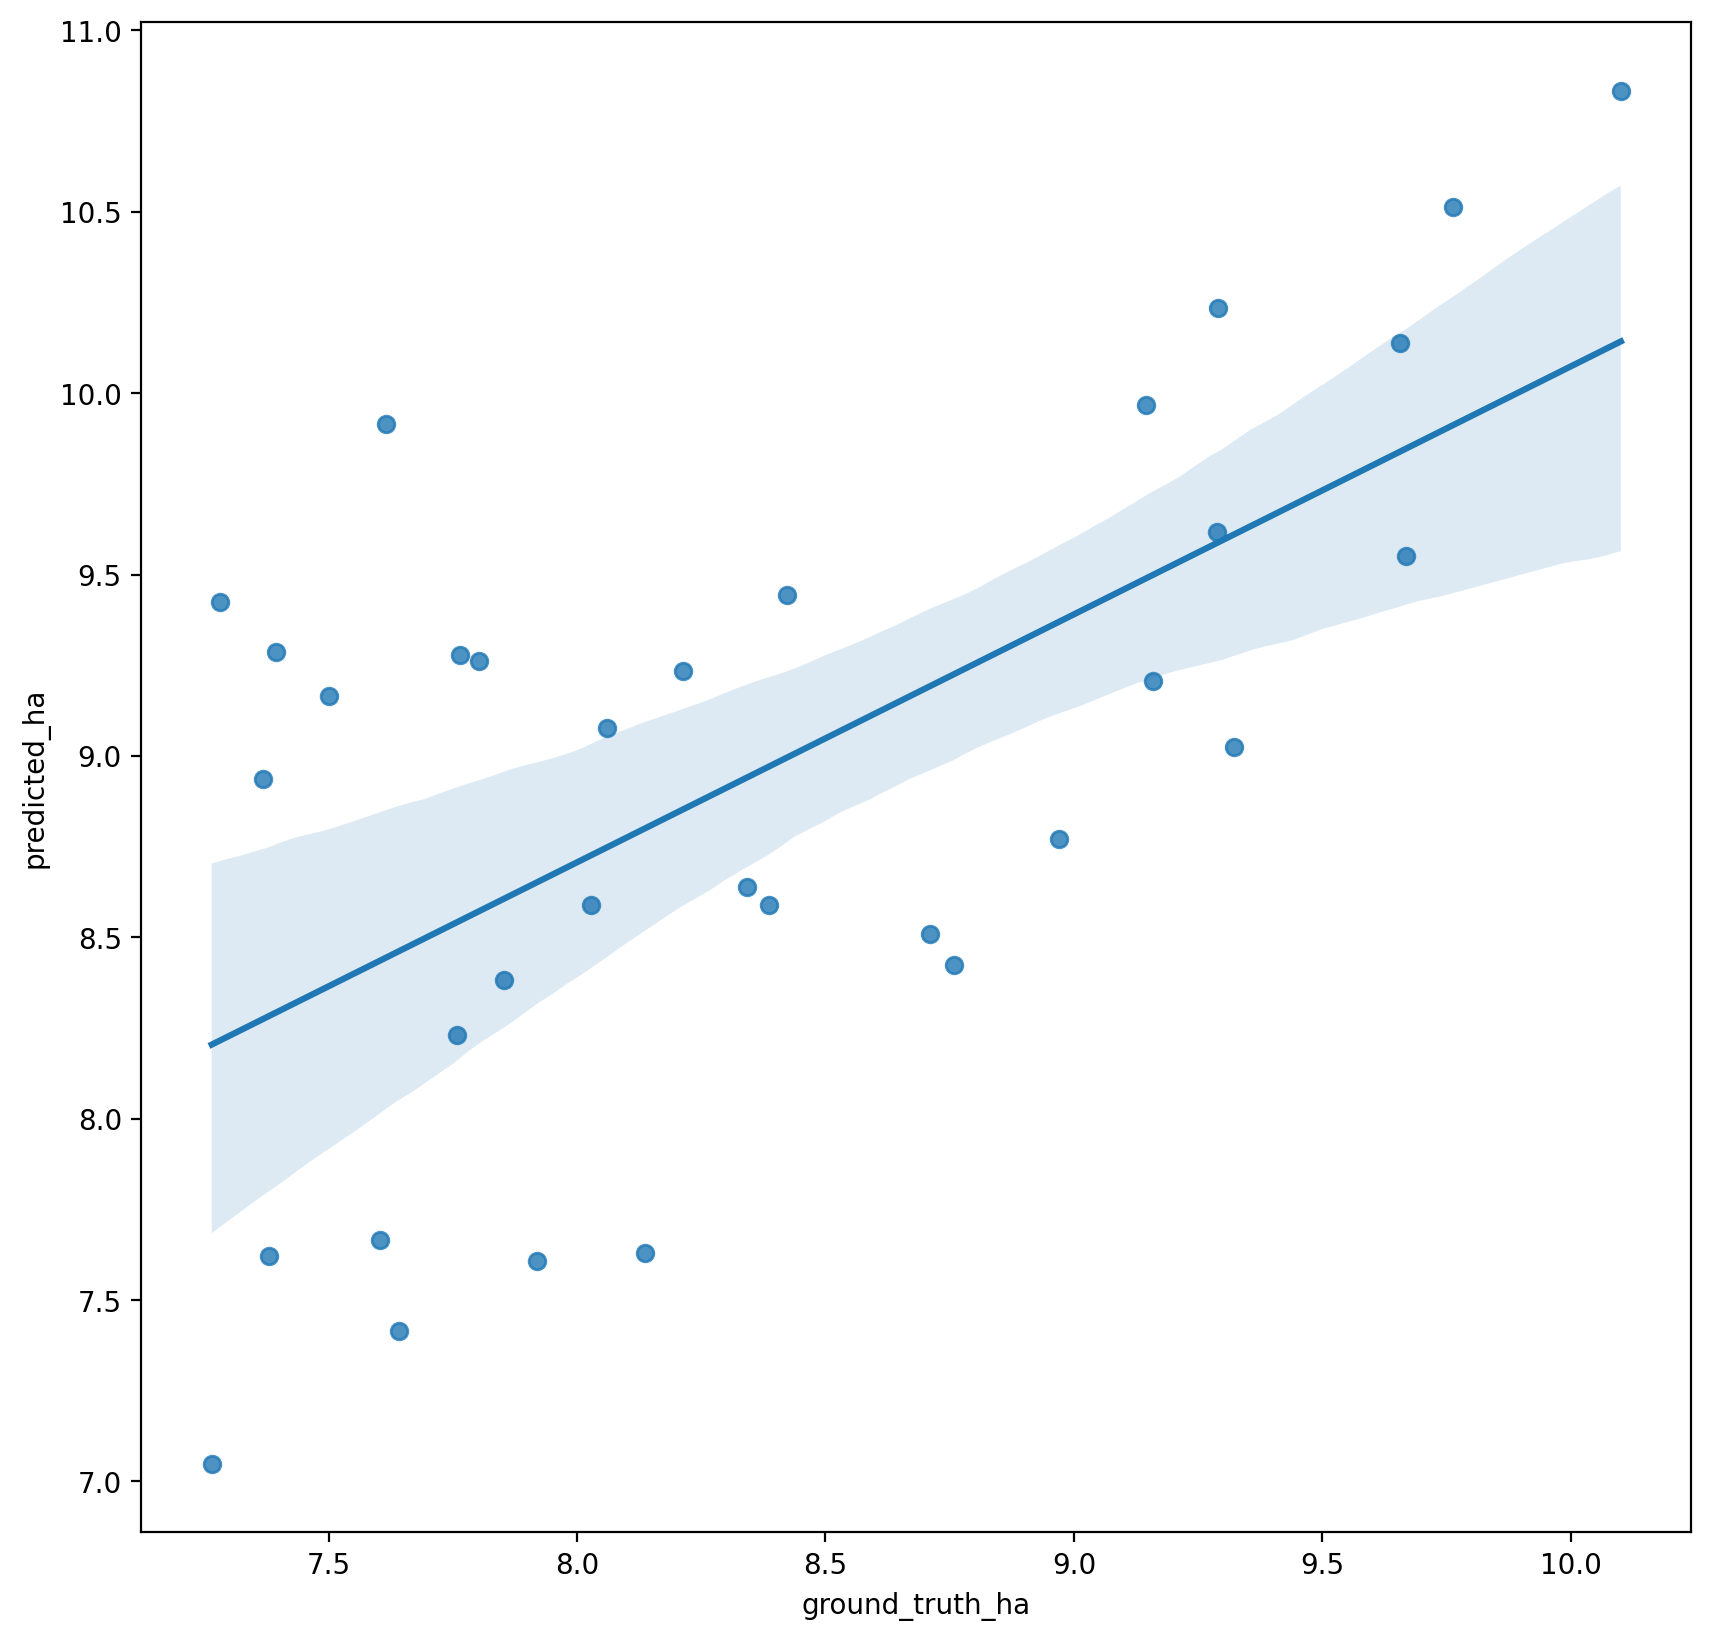

In [16]:
sub = one_j[one_j['quintile_ground_truth']==3]
fig, ax = plt.subplots(1,1, figsize=(10,10), dpi=200)
sns.regplot( x=np.log(sub['ground_truth_ha']), y=np.log(sub['predicted_ha']), ax=ax)
# sns.lineplot(x=sub['ground_truth_ha'], y=sub['ground_truth_ha'], ax=ax)